# Data visualization for the percentage of population infected by COVID-19

__Author: Shubham Abhay Deshpande__

__Matrikelnummer : 419665__

__Notebook Description:__

- This notebook will show a graph of percentage of population infected by COVID-19 for selected countries
- The data set used for this analysis is available on John Hopkins COVID-19 GitHub page. 
- To find the percentage of population infected, the number of infected people for a specific date is divided by population of that country.
- The data for population of a country is taken from a different John Hopkins GitHub page. It is available as a csv file on the GitHub page for vaccinated population.
- It is possible that the path from which data is taken in this notebook may not match exactly with the path on the user's computer. In such an event, my my sincere apologies. Please change the path in that case to a correct one. 


Importing the essential libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows',500)

import numpy as np

from datetime import datetime

import plotly.graph_objects as go
import plotly


# John Hopkins data from the GitHub

Embedded git pull in the notebook

In [2]:
# git_pull = subprocess.Popen( "/usr/bin/git pull" , 
#                      cwd = os.path.dirname( '../data/raw/COVID-19/' ), 
#                      shell = True, 
#                      stdout = subprocess.PIPE, 
#                      stderr = subprocess.PIPE )
# (out, error) = git_pull.communicate()


# print("Error : " + str(error)) 
# print("out : " + str(out))

In [3]:
# reading the data from the defined path in the folders

path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(path)

In [4]:
# Printing the head of the data to understand it's structure
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181666,181725,181808,181912,181987,182033,182072,182149,182228,182324
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277409,277444,277663,277940,278211,278504,278793,279077,279077,279167
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265975,265985,265993,266006,266015,266025,266030,266038,266049,266062
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,101320


separate the dates in the dataset

In [5]:
# Isolating the date to change the datatype of the column
time_idx = pd_raw.columns[4:]

df_plot = pd.DataFrame({'date': time_idx})
df_plot.head()


,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
# Finding the total number of countries in the dataset

len(pd_raw["Country/Region"]) 

285

In [20]:
# Checking if we can isolate and sum up the number of infected people for a single country
pd_raw[pd_raw["Country/Region"]=='US'].iloc[:,4::].sum(axis=0)

# Defining the list of countries that we want to find the infected people for.
country_list = ['India', 'US', 'Italy','Germany']


In [21]:
# Isolating the countries in a single dataframe and combining it with the date.
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw["Country/Region"]==each].iloc[:,4::].sum(axis = 0))

<AxesSubplot:xlabel='date'>

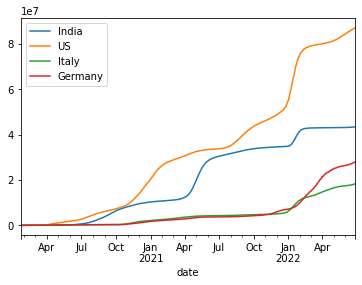

In [22]:
# Plotting the basic plot for understanding
%matplotlib inline
df_plot.set_index('date').plot()

# Data type Date

Changing the date time format from the given format to the YYYY-MM-DD format. Which is more widely accepted


In [26]:
time_idx = [datetime.strptime(each,'%m/%d/%y')for each in df_plot.date]
time_str = [each.strftime('%y-%m-%d')for each in time_idx]
time_str[0:6]

TypeError: strptime() argument 1 must be str, not Timestamp

In [ ]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df_plot.head()

,date,India,US,Italy
0,2020-01-22,0,1,0
1,2020-01-23,0,1,0
2,2020-01-24,0,2,0
3,2020-01-25,0,2,0
4,2020-01-26,0,5,0


In [ ]:
# Importing the data for the world population

path_wp = 'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/world_pop_by_country.csv'

wp = pd.read_csv(path_wp)

wp.head()

,Country Name,Country Code,2018
0,Aruba,ABW,105845.0
1,Afghanistan,AFG,37172386.0
2,Angola,AGO,30809762.0
3,Albania,ALB,2866376.0
4,Andorra,AND,77006.0


In [ ]:
# Calculating the percentage of infected people in each country in the country list

for each in country_list:
    var = np.array(wp.loc[wp["Country Name"]==each, "2018"])
    var = var.astype(int)
    df_plot[each] = df_plot[each]/var[0]*100
    
df_plot.head()

,date,India,US,Italy
0,2020-01-22,0.0,3.056539e-07,0.0
1,2020-01-23,0.0,3.056539e-07,0.0
2,2020-01-24,0.0,6.113078e-07,0.0
3,2020-01-25,0.0,6.113078e-07,0.0
4,2020-01-26,0.0,1.528269e-06,0.0


Plotting the data calculated above

In [ ]:
fig = go.Figure()

for each in country_list:
    fig.add_trace(go.Scatter(x = df_plot.date, 
                         y = df_plot[each], 
                        mode = 'markers+lines',
                        opacity = 0.9, 
                        line_width = 1,
                        marker_size = 2,
                        name = each))

fig.update_layout(width =900,
                 height = 750, 
                 xaxis_title = 'Time',
                 yaxis_title = "Confirmed Infected People as percentage of total pupulation (source: John Hopkins case, linear-scale)", 
                 )

fig.update_yaxes(type = 'linear', range = [0, 50])


# Choose the browser according to your preference

#fig.show(renderer='chrome')
#fig.show(renderer='firefox')

fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [ ]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'India', 'value': 'India'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Italy', 'value': 'Italy'}
            
        ],
        value=['US'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [ ]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=1,
                                marker_size=2, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Percentage of total population infected by COVID-19(source johns hopkins csse, linear-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"linear",
                       'range':'[1.1,5.5]'
                      }
        )
    }

In [ ]:
 app.run_server(debug = True, use_reloader = False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
